In [1]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from reg_resampler import resampler
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from verstack.stratified_continuous_split import scsplit

In [12]:
from category_encoders import TargetEncoder

In [2]:
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    else:
        return 4

In [19]:
expanded_data = pd.read_csv("data/new_all_features2.csv")
null_percentage = expanded_data.isnull().sum()/expanded_data.shape[0]*100
col_to_drop = null_percentage[null_percentage>60].keys()
output_df = expanded_data.drop(col_to_drop, axis=1)
expanded_data = output_df.dropna()
expanded_data['range'] = expanded_data["TEMPERATURE OPTIMUM"].apply(temp_range_to_no)
input_d = expanded_data.drop(columns = ["OBSERVATION","UNIPROT","EC Number",
                                        "EXACT","SEQUENCE","range","TEMPERATURE OPTIMUM"])
unnamed_cols  =  input_d.columns.str.contains('Unnamed')
input_d = input_d.drop(input_d[input_d.columns[unnamed_cols]], axis=1)

In [20]:
input_d["ORGANISM"].value_counts()

Homo sapiens                  831
Arabidopsis thaliana          294
Escherichia coli              267
Saccharolobus solfataricus    169
Mus musculus                  160
                             ... 
Staphylothermus marinus         1
Geobacillus sp. Gh6             1
Streptomyces rugosporus         1
Gongronella sp.                 1
Thiobacillus denitrificans      1
Name: ORGANISM, Length: 2227, dtype: int64

In [21]:
input_f = input_d.drop("ORGANISM", axis = 1)

In [22]:
scaler = StandardScaler()
# transform data
input_std = scaler.fit_transform(input_f)

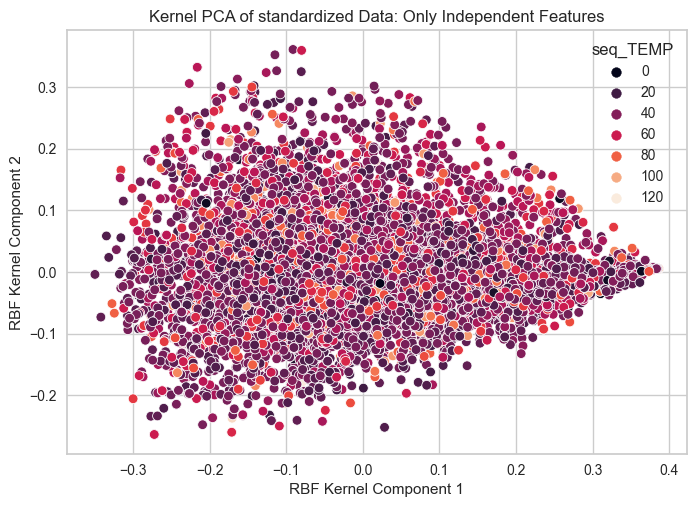

In [23]:
kpca = KernelPCA(n_components=2, kernel='rbf')
x_kpca = kpca.fit_transform(input_std)
x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = expanded_data["TEMPERATURE OPTIMUM"]
# Create cool scatter plot
fig = sns.scatterplot(x=x_tx[0], y=x_tx[1],
                hue=x_tx['seq_TEMP'],palette='rocket')
plt.xlabel("RBF Kernel Component 1")
plt.ylabel("RBF Kernel Component 2")
plt.title("Kernel PCA of standardized Data: Only Independent Features")
plt.show(fig)

In [28]:
from sklearn import decomposition

In [29]:
scaler = StandardScaler()
  # transform data
Data_Full_s = scaler.fit_transform(input_f)
Data_Full_s = pd.DataFrame(input_f, columns= input_f.columns)
Data_Full_s

,A,C,D,E,F,G,H,I,K,L,...,d21.1,d22.1,d23.1,d24.1,d25.1,d26.1,d27.1,d28.1,d29.1,d30.1
0,0.093190,0.017921,0.057348,0.046595,0.025090,0.089606,0.017921,0.075269,0.078853,0.064516,...,0.033836,0.031867,0.033830,0.031876,0.030197,0.033369,0.032534,0.028335,0.032076,0.032111
1,0.063091,0.009464,0.053628,0.063091,0.031546,0.104101,0.012618,0.123028,0.069401,0.082019,...,0.031418,0.031556,0.033632,0.030897,0.031789,0.032282,0.032068,0.031340,0.032466,0.032929
2,0.097983,0.014409,0.043228,0.072046,0.017291,0.100865,0.020173,0.069164,0.066282,0.092219,...,0.034026,0.029863,0.033804,0.032413,0.031012,0.032000,0.033222,0.030910,0.031784,0.033489
3,0.130312,0.028329,0.087819,0.062323,0.014164,0.107649,0.033994,0.016997,0.005666,0.084986,...,0.035015,0.032300,0.033928,0.033032,0.030483,0.032307,0.031558,0.030267,0.032947,0.031946
4,0.083333,0.017241,0.037356,0.074713,0.025862,0.123563,0.031609,0.063218,0.060345,0.077586,...,0.031395,0.031993,0.033432,0.031316,0.031943,0.029474,0.032667,0.033449,0.031992,0.034449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.108434,0.004016,0.040161,0.040161,0.012048,0.084337,0.040161,0.036145,0.032129,0.156627,...,0.032554,0.032789,0.033764,0.030094,0.029987,0.032062,0.031501,0.029819,0.031229,0.031287
9561,0.136364,0.005051,0.030303,0.010101,0.065657,0.085859,0.025253,0.040404,0.005051,0.161616,...,0.031286,0.031456,0.033371,0.031253,0.031196,0.032865,0.027629,0.030695,0.029946,0.031352
9562,0.116541,0.007519,0.041353,0.045113,0.030075,0.048872,0.000000,0.071429,0.052632,0.097744,...,0.031383,0.030835,0.033921,0.031157,0.030035,0.033989,0.034441,0.031213,0.032455,0.032272
9563,0.047855,0.013201,0.049505,0.052805,0.052805,0.072607,0.016502,0.052805,0.037954,0.151815,...,0.034319,0.033141,0.031993,0.030978,0.034058,0.032746,0.031105,0.032739,0.032919,0.032320


In [30]:
pca = decomposition.PCA(n_components=2000)
pca_data = pca.fit_transform(Data_Full_s)
pca_df = pd.DataFrame(data = pca_data)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-2.486937e+07,-51359.915593,-214312.335709,-830328.221221,-905959.723072,-727924.089315,488573.632325,754721.633217,363946.109992,-5790.283816,...,3.950141e-12,-1.404375e-11,5.637746e-12,-8.360395e-12,-6.122658e-12,-2.376611e-12,5.049626e-12,-5.377400e-12,3.556060e-12,-1.314775e-11
1,-7.983378e+06,-48448.006628,-5328.242870,41096.920764,-201452.126500,-25283.103438,63024.591019,23556.318798,-12361.215598,-71806.954613,...,-1.507909e-03,-4.111709e-04,-6.072129e-04,-9.217871e-04,5.262714e-04,-5.307388e-04,3.582896e-04,-9.181960e-04,3.124188e-04,8.709875e-04
2,-7.077542e+06,-30134.241320,-818.895871,-47214.383188,139831.345651,-201263.163925,182104.603048,-93272.616474,-214817.818000,204203.836769,...,-4.157151e-04,-6.792942e-04,1.009651e-03,-2.407875e-03,5.836997e-04,2.843523e-04,8.778620e-04,-1.691295e-04,-5.719340e-04,3.461321e-04
3,-5.811245e+06,117167.456607,-186525.649986,89317.562303,182235.543663,-211740.052702,123010.813929,-81151.111713,4604.147940,64873.917866,...,9.105516e-04,2.456830e-04,1.205693e-03,-5.954245e-04,4.344303e-04,4.331050e-04,2.055787e-03,-1.126164e-03,3.349754e-04,-3.496488e-05
4,-6.943725e+06,30228.760478,-28533.660459,157749.280759,76176.737396,-99134.662526,94430.287423,-68695.878309,141518.590112,42843.319428,...,9.659197e-04,-1.240818e-03,-1.948983e-03,-1.086099e-03,-4.035211e-04,-3.255353e-04,-2.726578e-04,5.299386e-04,2.397433e-04,-6.661640e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9497,-1.316199e+07,13974.255800,-117462.538676,80681.364811,-77545.044108,89313.321493,-88630.145522,-78554.663485,-59812.931254,113845.513796,...,9.644388e-04,-9.190701e-04,3.801889e-04,-6.729391e-04,-1.090411e-03,3.579296e-04,-2.241651e-04,-5.471748e-06,6.179103e-04,-3.001959e-04
9498,-1.592329e+07,-121745.564255,35291.529814,-123149.223126,-228050.707229,-133090.840945,155790.151464,-103956.652787,55526.760032,-5129.225725,...,3.847618e-04,-1.863157e-03,-6.013517e-04,4.713430e-04,4.642115e-05,3.577577e-04,4.439060e-04,1.634509e-04,-1.174200e-04,-4.845201e-04
9499,-1.183694e+07,188579.764900,54839.806771,117092.260021,-132739.177905,-10734.712959,-149987.535111,18054.171012,-130429.230044,85797.680483,...,6.567460e-04,-9.081786e-04,3.551228e-04,-1.563209e-03,-1.743316e-03,6.073370e-04,-9.565323e-05,1.813412e-04,-1.916650e-04,-1.101931e-03
9500,7.463319e+06,201953.214003,-80495.180655,-345876.388489,81445.559248,5821.354982,273863.677309,-51575.765740,94229.684632,-265307.269621,...,-6.216632e-04,-3.734283e-04,8.972332e-04,-3.431053e-04,2.595744e-05,7.616022e-05,1.106549e-04,-8.514795e-04,-9.164432e-04,2.083182e-04


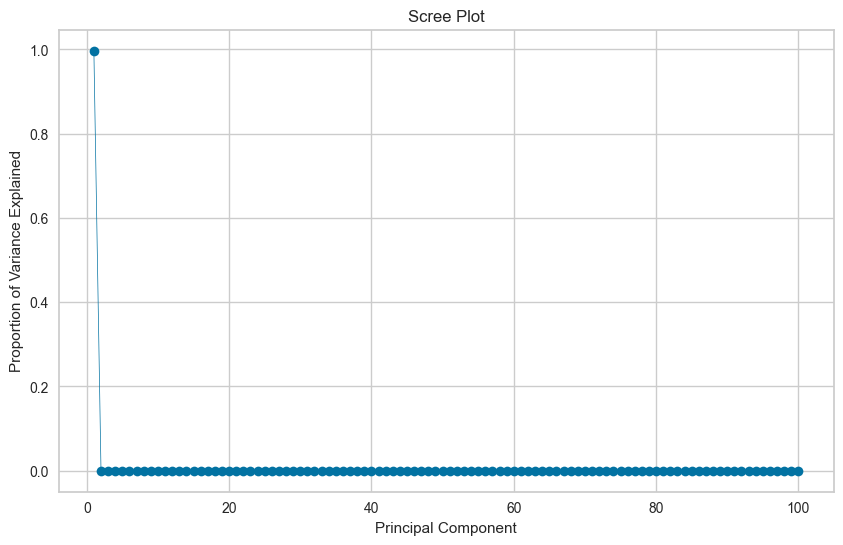

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(100) + 1
plt.figure(figsize=(10,6))
plt.plot(PC_values, pca.explained_variance_ratio_[0:100], 'bo-', linewidth=0.5)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [32]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_data,
    labels=labels,
    dimensions=range(4),
    color=expanded_data["TEMPERATURE OPTIMUM"]
)
fig.update_traces(diagonal_visible=False)

fig.update_layout(
                  dragmode='select',
                  width=1500,
                  height=800,
                  hovermode='closest')
fig.show()

In [36]:
input_d["TEMPERATURE OPTIMUM"] = expanded_data["TEMPERATURE OPTIMUM"]
input_d = input_d.reset_index()
input_d = input_d.drop("index", axis = 1)

In [42]:
train, test = scsplit(input_d, stratify = input_d["TEMPERATURE OPTIMUM"],test_size = 0.3,
                                             train_size = 0.7, random_state = 6)
    
X_train = train.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_train = train["TEMPERATURE OPTIMUM"]
X_test = test.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_test = test["TEMPERATURE OPTIMUM"]

In [43]:
enc = TargetEncoder(cols=['ORGANISM'], min_samples_leaf=20, smoothing=10).fit(X_train, y_train)
X_train = enc.transform(X_train)

In [44]:
enc2 = TargetEncoder(cols=['ORGANISM'], min_samples_leaf=20, smoothing=10).fit(X_test, y_test)
X_test = enc2.transform(X_test)

In [45]:
X_train

,ORGANISM,A,C,D,E,F,G,H,I,K,...,d21.1,d22.1,d23.1,d24.1,d25.1,d26.1,d27.1,d28.1,d29.1,d30.1
9303,39.165366,0.081288,0.018405,0.072086,0.085890,0.042945,0.070552,0.030675,0.058282,0.052147,...,0.031972,0.032922,0.033103,0.032599,0.034835,0.033259,0.032974,0.031246,0.032852,0.031538
270,38.648214,0.093458,0.018692,0.062305,0.037383,0.034268,0.099688,0.021807,0.093458,0.062305,...,0.031534,0.032059,0.031828,0.030738,0.032403,0.033100,0.031832,0.033622,0.032088,0.031834
8237,41.340677,0.075937,0.011834,0.061144,0.065089,0.040434,0.076923,0.025641,0.043393,0.068047,...,0.033236,0.032270,0.032201,0.032984,0.031466,0.032989,0.033205,0.032352,0.032581,0.032804
7534,71.426468,0.062069,0.004598,0.057471,0.075862,0.041379,0.078161,0.027586,0.066667,0.096552,...,0.032792,0.032228,0.032828,0.033084,0.031193,0.032230,0.031983,0.033124,0.033331,0.033099
6214,41.544311,0.065728,0.000000,0.032864,0.009390,0.037559,0.122066,0.009390,0.032864,0.037559,...,0.029142,0.030792,0.031549,0.033125,0.032780,0.036039,0.031115,0.029314,0.030153,0.032713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,32.692907,0.056391,0.020677,0.041353,0.063910,0.069549,0.060150,0.018797,0.065789,0.065789,...,0.032746,0.033027,0.033030,0.032611,0.032704,0.033588,0.033260,0.031932,0.032039,0.032450
7727,74.578766,0.056180,0.006421,0.057785,0.105939,0.049759,0.075441,0.024077,0.060995,0.081862,...,0.031762,0.033646,0.033223,0.031255,0.032400,0.032471,0.033831,0.031175,0.033140,0.032460
4497,32.801981,0.101754,0.003509,0.052632,0.028070,0.038596,0.080702,0.042105,0.070175,0.035088,...,0.033355,0.033348,0.034709,0.032072,0.032426,0.029700,0.030481,0.031434,0.032125,0.033207
4923,41.554984,0.091384,0.002611,0.086162,0.057441,0.033943,0.099217,0.020888,0.057441,0.075718,...,0.031911,0.031114,0.032734,0.030268,0.032315,0.034282,0.030287,0.032146,0.032092,0.031317


In [46]:
X_test

,ORGANISM,A,C,D,E,F,G,H,I,K,...,d21.1,d22.1,d23.1,d24.1,d25.1,d26.1,d27.1,d28.1,d29.1,d30.1
2796,39.825766,0.062654,0.008600,0.074939,0.068796,0.055283,0.093366,0.033170,0.045455,0.042998,...,0.032794,0.033981,0.032429,0.032618,0.032488,0.032285,0.031789,0.032471,0.032217,0.032704
2970,41.591179,0.079498,0.027197,0.079498,0.046025,0.046025,0.062762,0.020921,0.060669,0.027197,...,0.033507,0.032985,0.032621,0.031223,0.034370,0.033857,0.031109,0.031651,0.032710,0.031660
5320,41.591179,0.104218,0.017370,0.076923,0.024814,0.034739,0.114144,0.017370,0.064516,0.057072,...,0.031077,0.033089,0.034471,0.032220,0.034401,0.031054,0.030617,0.032165,0.033929,0.032818
1404,41.591179,0.085526,0.013158,0.059211,0.039474,0.019737,0.184211,0.059211,0.059211,0.046053,...,0.033622,0.030462,0.028544,0.032067,0.032859,0.029520,0.030326,0.032055,0.028694,0.031519
6880,35.371892,0.061080,0.018466,0.056818,0.079545,0.039773,0.056818,0.028409,0.035511,0.069602,...,0.033361,0.033048,0.032587,0.033316,0.032604,0.031765,0.034085,0.030131,0.033315,0.031673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,41.407881,0.085714,0.012500,0.041071,0.069643,0.050000,0.078571,0.026786,0.078571,0.042857,...,0.034946,0.034152,0.033346,0.033290,0.031826,0.032483,0.029964,0.032296,0.032694,0.033753
69,32.810277,0.099617,0.019157,0.057471,0.049808,0.026820,0.088123,0.003831,0.007663,0.053640,...,0.036055,0.029637,0.035738,0.032080,0.031875,0.032234,0.030006,0.028413,0.031091,0.031742
6992,43.827855,0.096552,0.005517,0.078621,0.045517,0.035862,0.088276,0.017931,0.040000,0.031724,...,0.033226,0.032501,0.031979,0.032243,0.033670,0.031960,0.032757,0.033862,0.032022,0.033245
3399,41.591179,0.094915,0.000000,0.037288,0.094915,0.027119,0.081356,0.006780,0.088136,0.047458,...,0.033252,0.034045,0.034439,0.031969,0.031293,0.031408,0.032022,0.032544,0.028935,0.030899


In [16]:
# rs = resampler()
# X_train["target"] = y_train
# Y_classes = rs.fit(X_train, target="target", bins= 10)
# Y =  y_train
# smote = SMOTE(random_state=27)
# final_X, final_Y = rs.resample(smote, X_train, Y_classes)
# X_train_R = X_train.drop(columns=["target"], axis = 1)


Class Distribution:
-------------------
0: 35
1: 559
2: 2755
3: 2835
4: 1264
5: 494
6: 295
7: 255
8: 49
9: 10



In [47]:

model = xgb.XGBRegressor( num_parallel_tree = 1,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.7,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 256,
                         min_child_weight = 10,
                         max_leaves =1,
                         grow_policy = 'lossguide'
                        )

model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=10)

[0]	validation_0-rmse:40.39320	validation_1-rmse:40.53751
[1]	validation_0-rmse:36.69571	validation_1-rmse:36.90763
[2]	validation_0-rmse:33.39185	validation_1-rmse:33.70577
[3]	validation_0-rmse:30.51748	validation_1-rmse:30.89580
[4]	validation_0-rmse:27.85329	validation_1-rmse:28.33090
[5]	validation_0-rmse:25.54147	validation_1-rmse:26.14655
[6]	validation_0-rmse:23.45253	validation_1-rmse:24.20921
[7]	validation_0-rmse:21.51316	validation_1-rmse:22.39447
[8]	validation_0-rmse:19.87909	validation_1-rmse:20.87961
[9]	validation_0-rmse:18.36653	validation_1-rmse:19.52120
[10]	validation_0-rmse:17.01862	validation_1-rmse:18.33190
[11]	validation_0-rmse:15.86402	validation_1-rmse:17.32791
[12]	validation_0-rmse:14.79004	validation_1-rmse:16.43704
[13]	validation_0-rmse:13.89538	validation_1-rmse:15.72877
[14]	validation_0-rmse:13.06246	validation_1-rmse:15.06221
[15]	validation_0-rmse:12.33453	validation_1-rmse:14.51955
[16]	validation_0-rmse:11.71243	validation_1-rmse:14.06722
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=1, gpu_id=-1,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=1, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

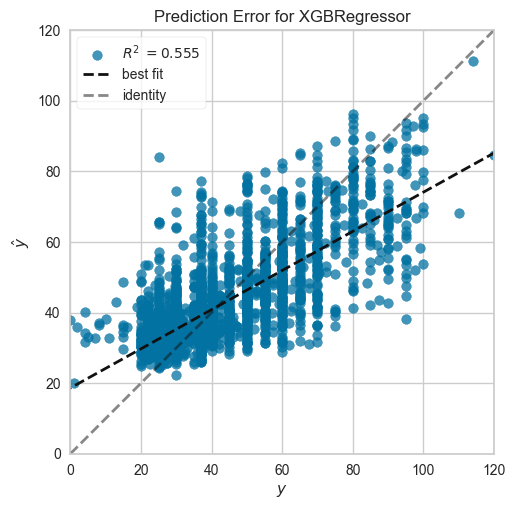

In [48]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model,X_train,y_train,X_test,y_test)

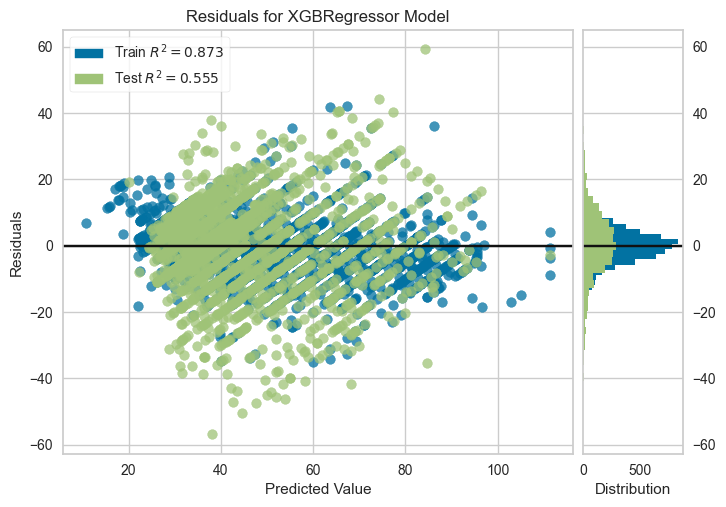

<AxesSubplot: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_test,y_test)  # Evaluate the model on the test data
visualizer.show()    

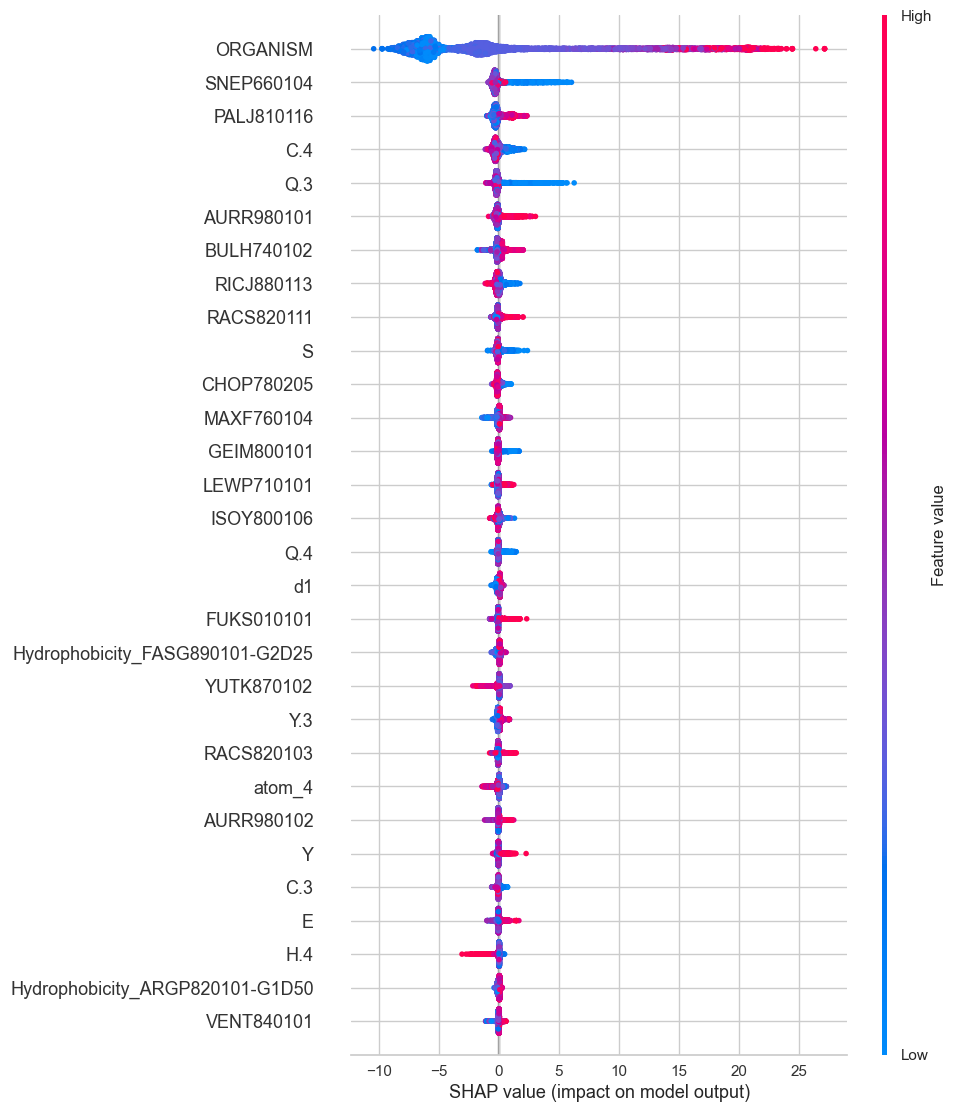

In [50]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train, max_display = 30)

In [12]:
r2_metric = []
from verstack.stratified_continuous_split import scsplit
from imblearn.over_sampling import SMOTE
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["TEMPERATURE OPTIMUM"],test_size = 0.2,
                                             train_size = 0.8, random_state = 3)
    
    X_train = train.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
    y_train = train["TEMPERATURE OPTIMUM"]
    X_test = test.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
    y_test = test["TEMPERATURE OPTIMUM"]
    
    rs = resampler()
    X_train["target"] = y_train
    Y_classes = rs.fit(X_train, target="target", bins= 10)
    Y =  y_train
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train, Y_classes)
    X_train_R = X_train.drop(columns=["target"], axis = 1)

 
    final_X_t, final_Y_t = X_test, y_test

    model = xgb.XGBRegressor(
                         num_parallel_tree = 1,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 1.0,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 256,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )

    model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_t,model.predict(final_X_t)) 
    r2_metric.append(r2_scr)


Class Distribution:
-------------------
0: 31
1: 497
2: 2449
3: 2521
4: 1123
5: 438
6: 259
7: 233
8: 43
9: 7

[0]	validation_0-rmse:62.30750	validation_1-rmse:40.11091
[1]	validation_0-rmse:56.42378	validation_1-rmse:36.16254
[2]	validation_0-rmse:51.13232	validation_1-rmse:32.68325
[3]	validation_0-rmse:46.37680	validation_1-rmse:29.63294
[4]	validation_0-rmse:42.09643	validation_1-rmse:26.95590
[5]	validation_0-rmse:38.24903	validation_1-rmse:24.63061
[6]	validation_0-rmse:34.79049	validation_1-rmse:22.61849
[7]	validation_0-rmse:31.68983	validation_1-rmse:20.89068
[8]	validation_0-rmse:28.90665	validation_1-rmse:19.42004
[9]	validation_0-rmse:26.40452	validation_1-rmse:18.17564
[10]	validation_0-rmse:24.15712	validation_1-rmse:17.13388
[11]	validation_0-rmse:22.13780	validation_1-rmse:16.26841
[12]	validation_0-rmse:20.33071	validation_1-rmse:15.55478
[13]	validation_0-rmse:18.70755	validation_1-rmse:14.97067
[14]	validation_0-rmse:17.26042	validation_1-rmse:14.49121
[15]	validatio

In [7]:
r2_metric

[0.46762603581928375, 0.4727926428512259, 0.5280706702261595]

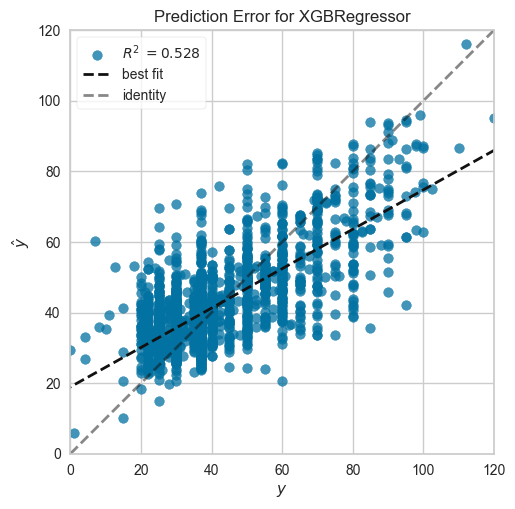

In [8]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, final_X,final_Y,final_X_t,final_Y_t)